In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

In [3]:
((x_train, y_train), (x_test, y_test)) = load_data("mnist.npz")
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [4]:
print(x_train.shape, type(x_train))
print(y_train.shape, type(y_train))

(60000, 28, 28) <class 'numpy.ndarray'>
(60000,) <class 'numpy.ndarray'>


4


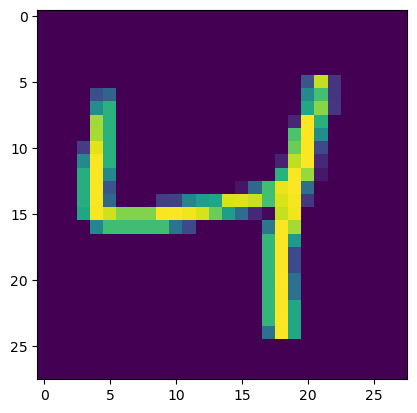

In [5]:
plt.imshow(x_train[2])
print(y_train[2])

In [6]:
from collections import Counter
cnt = Counter()
c = 0
trainX1k = []  
trainY1k = [] 
for i in range(6000):
    t = y_train[i]
    if cnt[t] < 10:
        cnt[t] += 1
        # np.append(trainX1k, x_train[i])
        trainX1k.append(x_train[i])
        trainY1k.append(t)
        if cnt[t] == 10:
            c += 1
    if c == 10:
        break 
trainX1k = np.array(trainX1k)
trainY1k = np.array(trainY1k)

In [7]:
print(trainX1k.shape, type(x_train))
print(trainY1k.shape, type(y_train))

(100, 28, 28) <class 'numpy.ndarray'>
(100,) <class 'numpy.ndarray'>


In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'] )

In [10]:
tf_callback1 = tf.keras.callbacks.TensorBoard(log_dir="./logs1")
tf_callback2 = tf.keras.callbacks.TensorBoard(log_dir="./logs2")

In [11]:
model.fit(x_train, y_train, epochs=50, callbacks=[tf_callback1])

Epoch 1/50
   1/1875 [..............................] - ETA: 0s - loss: 2.6490 - accuracy: 0.0312WARNING:tensorflow:From A:\software\miniconda\envs\tf\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 1s 606us/step - loss: 0.2944 - accuracy: 0.9153
Epoch 2/50
1875/1875 [==============================] - 1s 606us/step - loss: 0.1413 - accuracy: 0.9574
Epoch 3/50
1875/1875 [==============================] - 1s 583us/step - loss: 0.1069 - accuracy: 0.9678
Epoch 4/50
1875/1875 [==============================] - 1s 582us/step - loss: 0.0889 - accuracy: 0.9719
Epoch 5/50
1875/1875 [==============================] - 1s 585us/step - loss: 0.0761 - accuracy: 0.9767
Epoch 6/50
1875/1875 [==============================] - 1s 588us/step - loss: 0.0656 - accuracy: 0.9783
Epo

In [12]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.1191 - accuracy: 0.9800


[0.11913862079381943, 0.9800000190734863]

In [13]:
%load_ext tensorboard

In [22]:
%tensorboard --logdir logs1 --host localhost

In [15]:
model.fit(trainX1k, trainY1k, epochs=50, callbacks=[tf_callback2])

Epoch 1/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.9900
Epoch 2/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9800
Epoch 3/50
4/4 [==============================] - 0s 999us/step - loss: 0.0139 - accuracy: 0.9900
Epoch 4/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.9900
Epoch 5/50
4/4 [==============================] - 0s 998us/step - loss: 2.9852e-04 - accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 8/50
4/4 [==============================] - 0s 999us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 3.7713e-04 - accuracy: 1.0000
Epoch 10/50
4/4 [==============================] - 0s 1ms/step - loss: 5.8603e-04 - accuracy: 1.0000
Epoch 11/50
4/4 [====

In [16]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.1167 - accuracy: 0.9806


[0.11670375615358353, 0.9805999994277954]

In [17]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [23]:
%tensorboard --logdir logs2 --host localhost